## Model 1: Real data trained and tested on real data as well.

### Importing the data set into a data-frame:

In [ ]:
! git clone https://github.com/tapashreepradhan/ml-hydrides-software.git

fatal: destination path 'ml-hydrides-software' already exists and is not an empty directory.


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df_initial = pd.read_csv('/content/ml-hydrides-software/databases/ML-HYDPARK_v0.0.4.csv')
df_initial.head(), df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          430 non-null    int64  
 1   Material_Class                      405 non-null    object 
 2   Composition_Formula                 430 non-null    object 
 3   Hydrogen_Weight_Percent             400 non-null    float64
 4   Heat_of_Formation_kJperMolH2        430 non-null    float64
 5   Temperature_oC                      405 non-null    float64
 6   Pressure_Atmospheres_Absolute       403 non-null    float64
 7   Entropy_of_Formation_JperMolH2perK  430 non-null    float64
 8   Equilibrium_Pressure_25C            428 non-null    float64
 9   LnEquilibrium_Pressure_25C          430 non-null    float64
 10  HtoM                                400 non-null    float64
 11  Reference                           31 non-nu

(   Unnamed: 0 Material_Class Composition_Formula  Hydrogen_Weight_Percent  \
 0           0            A2B               Th2Al                      0.8   
 1           1            A2B               Ti2Cu                      2.2   
 2           2            A2B               Zr2Cu                      1.3   
 3           3            A2B               Zr2Ni                      1.3   
 4           4            A2B               Mg2Ni                      3.6   
 
    Heat_of_Formation_kJperMolH2  Temperature_oC  \
 0                         130.0           500.0   
 1                         130.0           500.0   
 2                         144.0           600.0   
 3                         183.0           604.0   
 4                          64.5           299.0   
 
    Pressure_Atmospheres_Absolute  Entropy_of_Formation_JperMolH2perK  \
 0                          0.001                          110.711134   
 1                          0.120                          150.515102 

### Handling the missing values:
Using the mean for numerical data and mode for the categorical data.

In [ ]:
# Fill missing values
# For numerical columns, fill with the mean
numerical_columns = df_initial.select_dtypes(include=['float64', 'int64']).columns
df_initial[numerical_columns] = df_initial[numerical_columns].apply(lambda x: x.fillna(x.mean()))

# For categorical columns, fill with the mode (the most frequent value)
categorical_columns = df_initial.select_dtypes(include=['object']).columns
df_initial[categorical_columns] = df_initial[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

# Check for any remaining missing values and the updated dataset info
df_initial.isnull().sum(), df_initial.head()

(Unnamed: 0                            0
 Material_Class                        0
 Composition_Formula                   0
 Hydrogen_Weight_Percent               0
 Heat_of_Formation_kJperMolH2          0
 Temperature_oC                        0
 Pressure_Atmospheres_Absolute         0
 Entropy_of_Formation_JperMolH2perK    0
 Equilibrium_Pressure_25C              0
 LnEquilibrium_Pressure_25C            0
 HtoM                                  0
 Reference                             0
 dtype: int64,
    Unnamed: 0 Material_Class Composition_Formula  Hydrogen_Weight_Percent  \
 0           0            A2B               Th2Al                      0.8   
 1           1            A2B               Ti2Cu                      2.2   
 2           2            A2B               Zr2Cu                      1.3   
 3           3            A2B               Zr2Ni                      1.3   
 4           4            A2B               Mg2Ni                      3.6   
 
    Heat_of_Formation_k

In [ ]:
#df_initial.to_csv('/content/ml-hydrides-software/databases/filledData.csv', index=False)

### Feature-selection and preprocessing:

We're dropping the columns that we dont need and splitting the dataset into features and target variable, followed by a train-test split.

In [ ]:
data = df_initial.drop(['Unnamed: 0', 'Reference', 'LnEquilibrium_Pressure_25C'], axis =1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Material_Class                      430 non-null    object 
 1   Composition_Formula                 430 non-null    object 
 2   Hydrogen_Weight_Percent             430 non-null    float64
 3   Heat_of_Formation_kJperMolH2        430 non-null    float64
 4   Temperature_oC                      430 non-null    float64
 5   Pressure_Atmospheres_Absolute       430 non-null    float64
 6   Entropy_of_Formation_JperMolH2perK  430 non-null    float64
 7   Equilibrium_Pressure_25C            430 non-null    float64
 8   HtoM                                430 non-null    float64
dtypes: float64(7), object(2)
memory usage: 30.4+ KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder as ohe

In [ ]:
# one-hot encoding of categorical variables

encoder = ohe(sparse_output=False)
encoded_categorical = encoder.fit_transform(data[['Material_Class', 'Composition_Formula']])
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(['Material_Class', 'Composition_Formula']))

# concatenate encoded categorical features with numerical features

numData = data.drop(['Material_Class', 'Composition_Formula'], axis=1)
prepData = pd.concat([numData, encoded_df], axis =1)

In [ ]:
# defining the features (X) and the target (y)
X = prepData.drop('Hydrogen_Weight_Percent', axis=1)
y = prepData['Hydrogen_Weight_Percent']

# splitting the dataset into training and testing tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# overview of the feature matrix
X_train.head(), X_train.shape, X_test.shape

(     Heat_of_Formation_kJperMolH2  Temperature_oC  \
 66                           28.8       60.000000   
 132                          26.0       25.000000   
 407                          21.0       91.001235   
 31                           29.5       25.000000   
 84                           21.0        0.000000   
 
      Pressure_Atmospheres_Absolute  Entropy_of_Formation_JperMolH2perK  \
 66                        0.400000                           78.829359   
 132                       3.000000                           96.338465   
 407                      12.870589                           85.000000   
 31                        2.600000                          106.887759   
 84                        8.000000                           94.169642   
 
      Equilibrium_Pressure_25C      HtoM  Material_Class_A2B  \
 66                   0.118023  1.524921                 0.0   
 132                  3.000000  1.169738                 0.0   
 407                  5.926101

In [ ]:
# downloading the split training data for the LLM

train_data = pd.concat([X_train, y_train], axis=1)
train_data.to_csv('trainDataLLM.csv', index=False)

from google.colab import files
files.download('trainDataLLM.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### SK-Learn Regressors:

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

In [ ]:
# function to train and evaluate a model on the testing data by computing the rmse and r-squared values

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

def evaluateModel(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  mse = mean_squared_error(y_test, predictions)
  rmse = sqrt(mse)
  r2 = r2_score(y_test, predictions)
  return rmse, r2

In [ ]:
# storing the results

results = {}

for model in models:
  model_name = model.__class__.__name__
  rmse, r2 = evaluateModel(model, X_train, y_train, X_test, y_test)
  results[model_name] = {'RMSE': rmse, 'R-Squared': r2}

In [ ]:
results

{'LinearRegression': {'RMSE': 0.4172123403506455,
  'R-Squared': 0.8494725529667262},
 'Ridge': {'RMSE': 0.4316219818465286, 'R-Squared': 0.8388951874438942},
 'Lasso': {'RMSE': 0.9139175590697461, 'R-Squared': 0.27770360402049343},
 'DecisionTreeRegressor': {'RMSE': 0.5037798984144878,
  'R-Squared': 0.7805260025363336},
 'RandomForestRegressor': {'RMSE': 0.39157172945280033,
  'R-Squared': 0.867405941663888},
 'GradientBoostingRegressor': {'RMSE': 0.40320357306715965,
  'R-Squared': 0.8594113861504813}}

### Visualizing the results:

actual vs predicted values

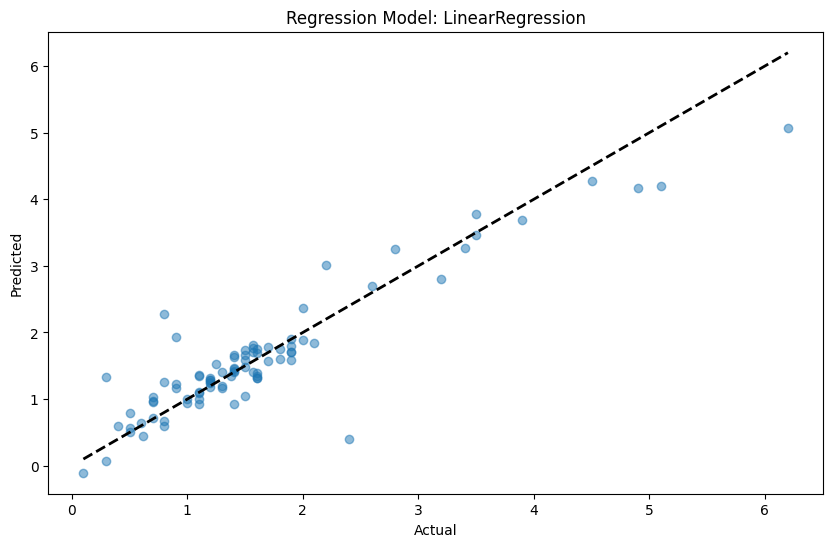

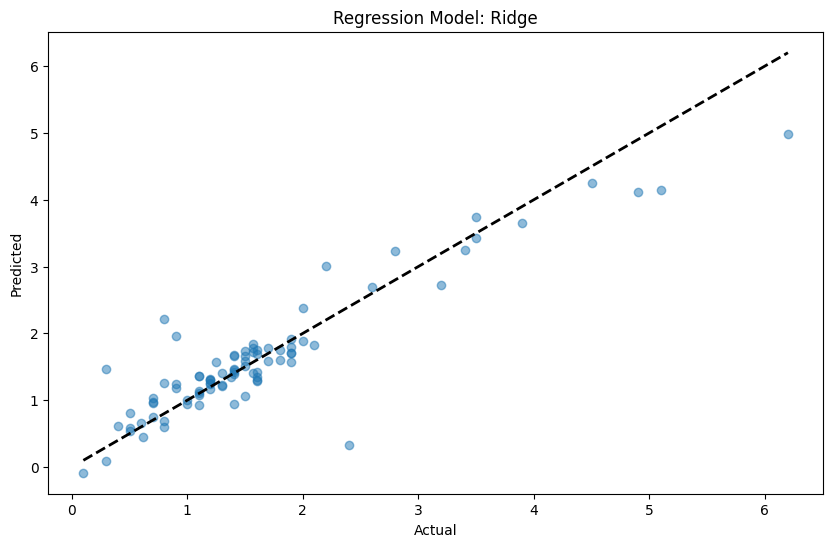

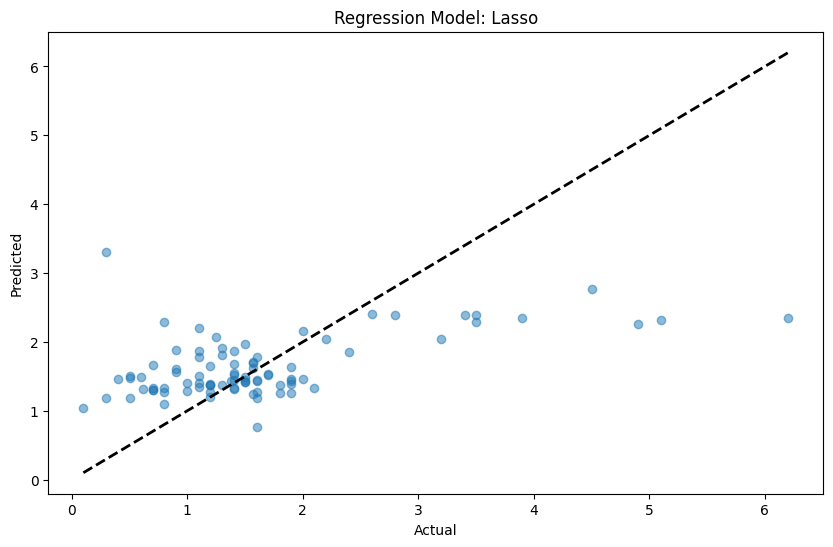

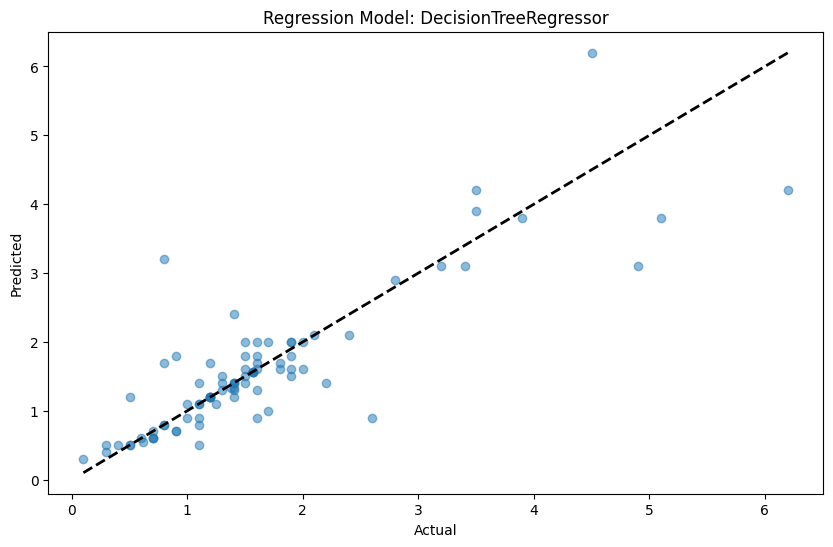

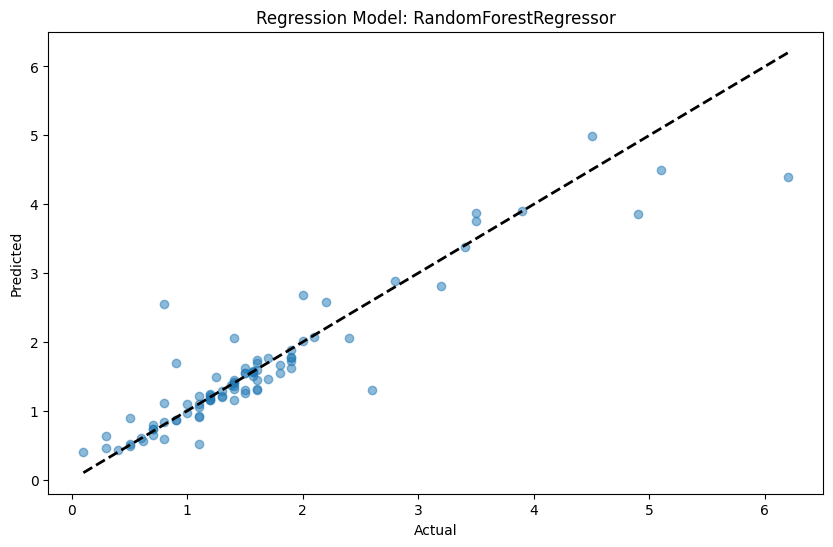

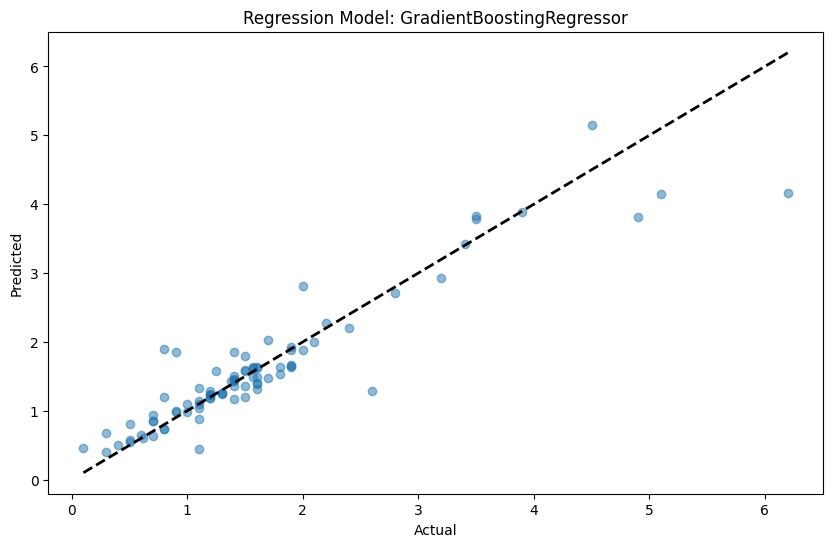

In [ ]:
import matplotlib.pyplot as plt

def plot_model_predictions(model, X_train, y_train, X_test, y_test):
    # Fit the model
    model.fit(X_train, y_train)
    # Predict on testing set
    predictions = model.predict(X_test)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, predictions, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Regression Model: {model.__class__.__name__}')
    plt.show()

# Define models
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

# Generate a plot for each model
for model in models:
    plot_model_predictions(model, X_train, y_train, X_test, y_test)

## Model 2: Trained on synthetic data and testing on real data.

### 20 Data Entries of Synthetic Dataset (No mix-up with test dataset)

In [ ]:
!rm -rf ml-hydrides-software/

In [ ]:
! git clone https://github.com/tapashreepradhan/ml-hydrides-software.git

Cloning into 'ml-hydrides-software'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 46 (delta 19), reused 11 (delta 3), pack-reused 0
Receiving objects: 100% (46/46), 46.77 KiB | 2.46 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [ ]:
synDat1 = pd.read_csv('/content/ml-hydrides-software/databases/synDat1.csv')
synDat2 = pd.read_csv('/content/ml-hydrides-software/databases/synData2.csv')

In [ ]:
synData = pd.concat([synDat1, synDat2], axis=0)

In [ ]:
synData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Hydrogen Weight Percent         20 non-null     float64
 1   Heat of Formation kJ/molH2      20 non-null     float64
 2   Temperature °C                  20 non-null     float64
 3   Pressure Atmospheres            20 non-null     float64
 4   Entropy of Formation J/molH2/K  20 non-null     float64
 5   Equilibrium Pressure at 25°C    20 non-null     float64
 6   Hydrogen to Metal Ratio         20 non-null     float64
dtypes: float64(7)
memory usage: 1.2 KB


In [ ]:
prepData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Columns: 444 entries, Hydrogen_Weight_Percent to Composition_Formula_ZrVFe
dtypes: float64(444)
memory usage: 1.5 MB


In [ ]:
# defining X and y again

# defining the features (X) and the target (y)
X = prepData.drop('Hydrogen_Weight_Percent', axis=1)
y = prepData['Hydrogen_Weight_Percent']

# splitting the dataset into training and testing tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = synData.drop('Hydrogen_Weight_Percent')